In [2]:
import math
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib.pylab import plt
import seaborn as sns

In [3]:
movies_df = pd.read_csv("movies_with_franchises.csv", index_col = 0)
games_df = pd.read_csv("clean_games_with_franchises.csv", index_col = 0)

C:\Users\35387\AppData\Local\Temp\ipykernel_60528\1545051576.py:1: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("movies_with_franchises.csv", index_col = 0)


In [24]:
movies_df[movies_df["franchise_id"] == "f0"]

,index,franchise_id,franchise_name,movie_name,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
4951,0.0,f0,The Aldrich Family,what a life,tt0032123,what a life,0,1939,75,"Comedy,Drama",6.9,93.0
4952,1.0,f0,The Aldrich Family,life with henry,tt0033834,life with henry,0,1940,80,"Comedy,Family,Music",6.0,49.0
4953,2.0,f0,The Aldrich Family,henry aldrich for president,tt0033708,henry aldrich for president,0,1941,75,"Comedy,Family",6.6,146.0
4954,3.0,f0,The Aldrich Family,"henry aldrich, editor",tt0034842,"henry aldrich, editor",0,1942,72,"Comedy,Drama,Family",6.4,150.0
4955,4.0,f0,The Aldrich Family,henry and dizzy,tt0034844,henry and dizzy,0,1942,71,"Comedy,Family",7.2,58.0
4956,5.0,f0,The Aldrich Family,henry aldrich swings it,tt0035985,henry aldrich swings it,0,1943,64,"Comedy,Family",8.3,110.0
4957,6.0,f0,The Aldrich Family,henry aldrich gets glamour,tt0035983,henry aldrich gets glamour,0,1943,72,"Adventure,Comedy,Family",6.4,130.0
4958,7.0,f0,The Aldrich Family,henry aldrich haunts a house,tt0035984,henry aldrich haunts a house,0,1943,73,"Adventure,Comedy,Family",6.3,151.0
4959,8.0,f0,The Aldrich Family,"henry aldrich, boy scout",tt0036909,"henry aldrich, boy scout",0,1944,66,"Comedy,Family",6.5,129.0
4960,9.0,f0,The Aldrich Family,henry aldrich plays cupid,tt0036907,henry aldrich plays cupid,0,1944,65,"Comedy,Family",8.2,100.0


- Normalize movies and games 
- Calculate z-scores
- Add the following headings\
    &emsp;"Time until next movie"\
    &emsp;"Difference in rating"
    
    &emsp;"Number in Franchise"

In [36]:
grp = movies_df.groupby(["franchise_id"])
#for name, group in grp:
#    print(name)
#    print(group)
#    print()

grp.get_group('f0')

,index,franchise_id,franchise_name,movie_name,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
4951,0.0,f0,The Aldrich Family,what a life,tt0032123,what a life,0,1939,75,"Comedy,Drama",6.9,93.0
4952,1.0,f0,The Aldrich Family,life with henry,tt0033834,life with henry,0,1940,80,"Comedy,Family,Music",6.0,49.0
4953,2.0,f0,The Aldrich Family,henry aldrich for president,tt0033708,henry aldrich for president,0,1941,75,"Comedy,Family",6.6,146.0
4954,3.0,f0,The Aldrich Family,"henry aldrich, editor",tt0034842,"henry aldrich, editor",0,1942,72,"Comedy,Drama,Family",6.4,150.0
4955,4.0,f0,The Aldrich Family,henry and dizzy,tt0034844,henry and dizzy,0,1942,71,"Comedy,Family",7.2,58.0
4956,5.0,f0,The Aldrich Family,henry aldrich swings it,tt0035985,henry aldrich swings it,0,1943,64,"Comedy,Family",8.3,110.0
4957,6.0,f0,The Aldrich Family,henry aldrich gets glamour,tt0035983,henry aldrich gets glamour,0,1943,72,"Adventure,Comedy,Family",6.4,130.0
4958,7.0,f0,The Aldrich Family,henry aldrich haunts a house,tt0035984,henry aldrich haunts a house,0,1943,73,"Adventure,Comedy,Family",6.3,151.0
4959,8.0,f0,The Aldrich Family,"henry aldrich, boy scout",tt0036909,"henry aldrich, boy scout",0,1944,66,"Comedy,Family",6.5,129.0
4960,9.0,f0,The Aldrich Family,henry aldrich plays cupid,tt0036907,henry aldrich plays cupid,0,1944,65,"Comedy,Family",8.2,100.0


In [51]:
movies_df['franchise_count'] = movies_df['franchise_id'].map(movies_df['franchise_id'].value_counts())
movies_df

,index,franchise_id,franchise_name,movie_name,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,z_rating_for_movie,franchise_count
0,12.0,f1,Coffin Joe,this night i'll possess your corpse,tt0060380,esta noite encarnarei no teu cadáver,0,1967,108,Horror,7.0,1952.0,0.604635,13.0
1,5002.0,f822,Coffin' Joe,this night i will possess your corpse,tt0060380,esta noite encarnarei no teu cadáver,0,1967,108,Horror,7.0,1952.0,0.604635,3.0
2,13.0,f1,Coffin Joe,the strange world of coffin joe,tt0062943,the strange world of coffin joe,0,1968,80,Horror,6.3,653.0,0.091174,13.0
3,14.0,f1,Coffin Joe,awakening of the beast,tt0062690,awakening of the beast,0,1970,93,"Drama,Horror",5.8,1208.0,-0.275585,13.0
4,16.0,f1,Coffin Joe,the bloody exorcism of coffin joe,tt0071479,exorcismo negro,0,1974,100,Horror,6.0,274.0,-0.128882,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290733,NaN,NaN,NaN,NaN,tt9916270,il talento del calabrone,0,2020,84,Thriller,5.8,1414.0,-0.275585,NaN
290734,NaN,NaN,NaN,NaN,tt9916362,coven,0,2020,92,"Drama,History",6.4,5293.0,0.164525,NaN
290735,NaN,NaN,NaN,NaN,tt9916428,the secret of china,0,2019,\N,"Adventure,History,War",3.8,14.0,-1.742619,NaN
290736,NaN,NaN,NaN,NaN,tt9916538,kuambil lagi hatiku,0,2019,123,Drama,8.6,7.0,1.778262,NaN


In [4]:
cols = ["tconst", "averageRating", "numVotes", "startYear"]
#new_cols = ["tconst", "rating", "votes", "year"]

games_scores = games_df[cols]

movies_scores = movies_df[cols]

In [7]:
%matplotlib inline

sns.set_context("talk", font_scale=.9)   
sns.set_context('talk')

fig_width, fig_height = 4, 3

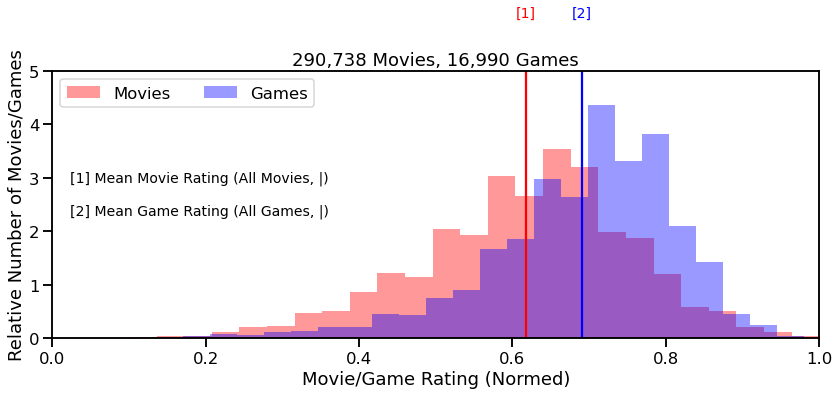

In [12]:
fig, ax = plt.subplots(figsize=(fig_width*3, fig_height*2))

interval = 0.01
((movies_scores['averageRating']/10)).hist(
    bins=25, ax=ax, grid=False, color="red", density=True, alpha=.4)
((games_scores['averageRating']/10)).hist(
    bins=25, ax=ax, grid=False, color="blue", density=True, alpha=.4)


ax.set_ylim(0, 5)
ax.set_xlim(0, 1)

ax.legend(['Movies', 'Games'], ncol=2, loc='upper left')

mean_movie_rating = (movies_scores['averageRating']/10).mean()
mean_game_rating = (games_scores['averageRating']/10).mean()

ax.axvline(mean_movie_rating, color="red")
ax.axvline(mean_game_rating, color="blue")

ax.text(mean_movie_rating, 6, '[1]', ha='center',color="red", backgroundcolor='w', fontsize=14)

ax.text(mean_game_rating, 6, '[2]', ha='center',color="blue", backgroundcolor='w', fontsize=14)


ax.text(
    0, 2,
    '''
    [1] Mean Movie Rating (All Movies, |)
    
    [2] Mean Game Rating (All Games, |)
    ''',
    fontsize=14
)

ax.set_xlabel('Movie/Game Rating (Normed)')
ax.set_ylabel('Relative Number of Movies/Games')

ax.set_title('{:,} Movies, {:,} Games'.format(len(movies_scores), len(games_scores)))

fig.tight_layout()

#fig.savefig('../../graphs/2400_fig_1_normed_rating_distributions.png', format='png', dpi=300)

In [37]:
movies_df['averageRating'].agg(['mean', 'std'])

mean    6.175704
std     1.363298
Name: averageRating, dtype: float64

In [39]:
movies_df['averageRating']

0         7.0
1         7.0
2         6.3
3         5.8
4         6.0
         ... 
290733    5.8
290734    6.4
290735    3.8
290736    8.6
290737    8.3
Name: averageRating, Length: 290738, dtype: float64

In [40]:
(movies_df['averageRating']-movies_df['averageRating'].mean())/movies_df['averageRating'].std()

0         0.604634
1         0.604634
2         0.091173
3        -0.275584
4        -0.128881
            ...   
290733   -0.275584
290734    0.164525
290735   -1.742616
290736    1.778259
290737    1.558205
Name: averageRating, Length: 290738, dtype: float64

In [41]:
stats.zscore(movies_df['averageRating'])

0         0.604635
1         0.604635
2         0.091174
3        -0.275585
4        -0.128882
            ...   
290733   -0.275585
290734    0.164525
290735   -1.742619
290736    1.778262
290737    1.558207
Name: averageRating, Length: 290738, dtype: float64

In [42]:
stats.zscore(movies_df['averageRating']).mean()

3.0932697276300133e-15

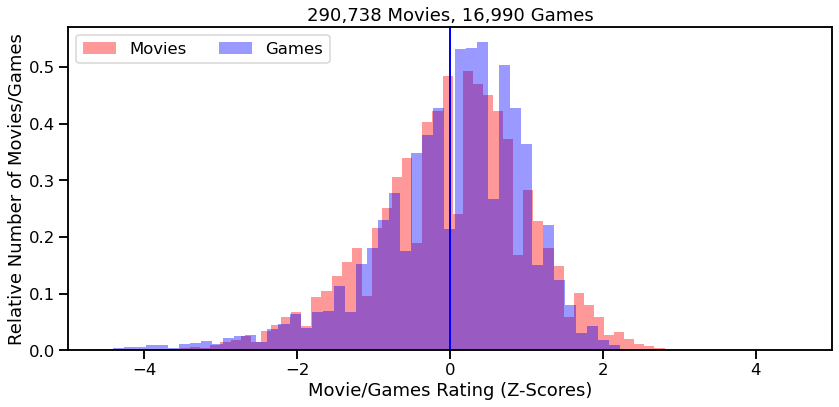

In [46]:
movies_df['z_rating_for_movie'] = stats.zscore(movies_df['averageRating'])

games_df['z_rating_for_game'] = stats.zscore(games_df['averageRating'])

fig, ax = plt.subplots(figsize=(fig_width*3, fig_height*2))


((movies_df['z_rating_for_movie'])).hist(
    bins=50, ax=ax, grid=False, color="red", density=True, alpha=.4)
((games_df['z_rating_for_game'])).hist(
    bins=50, ax=ax, grid=False, color="blue", density=True, alpha=.4)


ax.set_xlim(-5, 5)

ax.legend(['Movies', 'Games'], ncol=2, loc='upper left')

ax.axvline((movies_df['z_rating_for_movie']).mean(), lw=2, c="red")
ax.axvline((games_df['z_rating_for_game']).mean(), lw=2, c="blue")


ax.set_xlabel('Movie/Games Rating (Z-Scores)')
ax.set_ylabel('Relative Number of Movies/Games')
ax.set_title('{:,} Movies, {:,} Games'.format(len(movies_df), len(games_df)))

fig.tight_layout()

#fig.savefig('../../graphs/2400_fig_2_z_rating_distributions.png', format='png', dpi=300)

In [39]:
sample_df = movies_df.sample(100000)
grouped_df = sample_df.groupby('franchise_id').apply(sample_func)

In [41]:
grouped_df

franchise_id           
f0            tt0034842    1
              tt0035983    2
f1            tt0062690    1
              tt0067099    2
f100          tt0069975    1
                          ..
f990          tt0160831    1
f993          tt0040018    1
f994          tt0071198    1
              tt1172060    2
f996          tt2141789    1
Length: 2726, dtype: int64

In [23]:
franchise_df = grouped_df[grouped_df['franchise_id'] == 'f1334']

In [38]:
def sample_func(sub_df):
    
    movies_in_order = sub_df.sort_values('startYear')['tconst']
    return pd.Series({movie:k+1 for k,movie enumerate(movies_in_order)})

In [31]:
sample_func(franchise_df)

{'tt0019252': 1,
 'tt0027391': 2,
 'tt0039080': 3,
 'tt0041529': 4,
 'tt0053266': 5,
 'tt1728204': 6,
 'tt10017014': 7,
 'tt1728202': 8,
 'tt0056462': 9,
 'tt1729239': 10,
 'tt1729195': 11,
 'tt1729182': 12,
 'tt0056705': 13,
 'tt1729232': 14,
 'tt1729202': 15,
 'tt1729234': 16,
 'tt1729219': 17,
 'tt1729220': 18,
 'tt8024684': 19,
 'tt2072297': 20,
 'tt0058785': 21,
 'tt1730129': 22,
 'tt10197604': 23,
 'tt0066945': 24,
 'tt0236124': 25,
 'tt0184832': 26,
 'tt0079756': 27,
 'tt0322110': 28,
 'tt0084855': 29,
 'tt0092609': 30,
 'tt0371083': 31,
 'tt0111693': 32,
 'tt0111198': 33,
 'tt0120658': 34,
 'tt0197753': 35,
 'tt0256856': 36,
 'tt0328868': 37,
 'tt0396190': 38,
 'tt1726861': 39,
 'tt3415554': 40,
 'tt6721536': 41,
 'tt3462710': 42,
 'tt8633250': 43,
 'tt8612792': 44,
 'tt9010626': 45,
 'tt18341878': 46,
 'tt22178922': 47}

In [47]:
l = ['a','b','c']
for k,i in enumerate(l):
    print(k,i)
    print(i,  '-->',  k+1)

0 a
a --> 1
1 b
b --> 2
2 c
c --> 3


In [55]:
franchise_df.sort_values('startYear')['startYear']

7724    1928
7731    1936
7800    1946
7726    1949
7801    1959
4702    1961
4706    1961
4704    1961
7793    1962
4713    1962
4711    1962
4716    1962
7802    1962
4722    1963
4718    1963
7752    1963
4719    1963
4720    1963
4731    1964
4729    1964
7735    1964
7810    1965
4736    1965
7777    1971
7761    1973
7805    1977
7809    1979
7779    1980
7804    1982
7736    1987
7746    1989
7787    1994
7771    1995
7758    1999
7727    2000
7745    2001
7737    2003
7772    2004
7764    2011
7730    2014
7770    2017
7790    2017
7768    2018
7767    2018
7776    2020
7806    2021
7729    2022
Name: startYear, dtype: object

In [56]:
franchise_df.set_index('tconst').sort_values('startYear')['startYear'].map(int).diff()

tconst
tt0019252      NaN
tt0027391      8.0
tt0039080     10.0
tt0041529      3.0
tt0053266     10.0
tt1728204      2.0
tt10017014     0.0
tt1728202      0.0
tt0056462      1.0
tt1729239      0.0
tt1729195      0.0
tt1729182      0.0
tt0056705      0.0
tt1729232      1.0
tt1729202      0.0
tt1729234      0.0
tt1729219      0.0
tt1729220      0.0
tt8024684      1.0
tt2072297      0.0
tt0058785      0.0
tt1730129      1.0
tt10197604     0.0
tt0066945      6.0
tt0236124      2.0
tt0184832      4.0
tt0079756      2.0
tt0322110      1.0
tt0084855      2.0
tt0092609      5.0
tt0371083      2.0
tt0111693      5.0
tt0111198      1.0
tt0120658      4.0
tt0197753      1.0
tt0256856      1.0
tt0328868      2.0
tt0396190      1.0
tt1726861      7.0
tt3415554      3.0
tt6721536      3.0
tt3462710      0.0
tt8633250      1.0
tt8612792      0.0
tt9010626      2.0
tt18341878     1.0
tt22178922     1.0
Name: startYear, dtype: float64